<a href="https://colab.research.google.com/github/olivermueller/amlta2021/blob/main/Session_01/1_01_Counting_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#003660">Applied Machine Learning for Text Analysis (M.184.5331)</font>

XXX

In [ ]:
# Set up Google Drive

from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Colab Notebooks/AMLTA2021/Session_01

!pip install pymysql

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/AMLTA2021/Session_01


# <font color="#003660">Week 1: Basics of Natural Language Processing</font>

# <font color="#003660">Notebook 1: Counting Words</font>

<center><br><img width=256 src="https://git.uni-paderborn.de/data.analytics.teaching/aml4ta-2020/-/raw/master/resources/dag.png"/><br></center>

<p>
<center>
<div>
    <font color="#085986"><b>By the end of this lesson, you will be able to...</b><br><br>
        ... bla bla bla, and<br>
        ... bla bla bla.</font>
</div>
</center>
</p>

# Import packages

As always, we first need to load a number of required Python packages:
- `pandas` provides high-performance, easy-to-use data structures and data analysis tools.
- `NLTK` is a well-known package for building Python programs to work with human language data.

In [ ]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

To work with the `NLTK` package, you also need to download some additional data (e.g., stopword lists).

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load documents
For this first example, we create 7 documents by hand, each consisting of only one sentence. The documents are stored in a list called `corpus`.

In [ ]:
corpus = [
    "Hello World.",
    "How are you today?",
    "The world is nice.",
    "The weather is also nice.",
    "Yesterday, the weather was also nice.",
    "I own two bicycles.",
    "I love to ride my bicycle."
]

In [ ]:
corpus

['Hello World.',
 'How are you today?',
 'The world is nice.',
 'The weather is also nice.',
 'Yesterday, the weather was also nice.',
 'I own two bicycles.',
 'I love to ride my bicycle.']

In [ ]:
corpus[5]

'I own two bicycles.'

# Preprocess documents
As many natural language processing techniques process sequences of words, we have to tokenize the documents, that is, break them up into sequences of words. To do this, we iterate through each document in the corpus and transform them into lists of tokens. The result is a list of lists.

In [ ]:
docs_tokenized = []
for doc in corpus:
    tokens = doc.split(" ") # Split by whitespace
    #tokens = nltk.word_tokenize(doc) # Use a smarter tokenizer from the NLTK package
    docs_tokenized.append(tokens)

In [ ]:
docs_tokenized

[['Hello', 'World.'],
 ['How', 'are', 'you', 'today?'],
 ['The', 'world', 'is', 'nice.'],
 ['The', 'weather', 'is', 'also', 'nice.'],
 ['Yesterday,', 'the', 'weather', 'was', 'also', 'nice.'],
 ['I', 'own', 'two', 'bicycles.'],
 ['I', 'love', 'to', 'ride', 'my', 'bicycle.']]

# Counting words
We are now ready to analyze the documents. We use NLTK's `FreqDist` method (http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist) to create a word frequency distribution from the preprocessed documents. The method expects a single list of words as the input parameter. Hence, we have to first flatten our list of lists (https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python).

In [ ]:
flat_docs_tokenized_1 = [item for sublist in docs_tokenized for item in sublist]
freq_dist_1 = nltk.FreqDist(flat_docs_tokenized_1)

Print the results.

In [ ]:
freq_dist_1

FreqDist({'Hello': 1,
          'How': 1,
          'I': 2,
          'The': 2,
          'World.': 1,
          'Yesterday,': 1,
          'also': 2,
          'are': 1,
          'bicycle.': 1,
          'bicycles.': 1,
          'is': 2,
          'love': 1,
          'my': 1,
          'nice.': 3,
          'own': 1,
          'ride': 1,
          'the': 1,
          'to': 1,
          'today?': 1,
          'two': 1,
          'was': 1,
          'weather': 2,
          'world': 1,
          'you': 1})

When plotting the results, we observe some unwanted results. For example, the tokens `The` and `the` are counted as separate words.

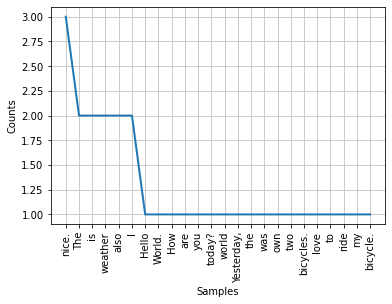

In [ ]:
freq_dist_1.plot(30, cumulative=False)

# More preprocessing
To address the above problem, we go back to preprocessing and transform all tokens to lowercase.

In [ ]:
docs_tokenized_lower = []
for doc in docs_tokenized:
    tokens = []
    for token in doc:
        tokens.append(token.lower())
    docs_tokenized_lower.append(tokens)

In [ ]:
docs_tokenized_lower

[['hello', 'world.'],
 ['how', 'are', 'you', 'today?'],
 ['the', 'world', 'is', 'nice.'],
 ['the', 'weather', 'is', 'also', 'nice.'],
 ['yesterday,', 'the', 'weather', 'was', 'also', 'nice.'],
 ['i', 'own', 'two', 'bicycles.'],
 ['i', 'love', 'to', 'ride', 'my', 'bicycle.']]

# Recounting words
And we create and plot the frequency distribution again.

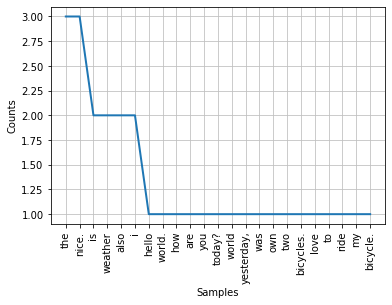

In [ ]:
flat_docs_tokenized_2 = [item for sublist in docs_tokenized_lower for item in sublist]
freq_dist_2 = nltk.FreqDist(flat_docs_tokenized_2)
freq_dist_2.plot(30, cumulative=False)

Now, `the` is only counted once (3 occurences). But there are still problems. For example, `bicycle` and `bicycles`.

# More preprocessing
We can fix this issue with 
- stemming (https://en.wikipedia.org/wiki/Stemming) or

In [ ]:
stemmer = PorterStemmer()
print(stemmer.stem('bicycles'))

bicycl


- lemmatization (https://en.wikipedia.org/wiki/Lemmatisation).

`NLTK`'s WordNetLemmatizer reduces tokens to their dictionary form. We have to tell the lemmatization method which part of speech (https://en.wikipedia.org/wiki/Part_of_speech) the word to be lemmatized is.

In [ ]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('bicycles','n')) # n = noun, v = verb, ...

bicycle


To lemmatize all tokens in all documents, we again iterate through our list of documents and call the lemmatize method on each word. Unfortunately, the results are somewhat surprising, as we don't know which part of speech the tokens are (see, e.g., `was` -> `wa`). For now, we ignore these mistakes. We will learn how to consider part of speech later.

In [ ]:
docs_tokenized_lower_lemmatized = []
for doc in docs_tokenized_lower:
    tokens = []
    for token in doc:
        tokens.append(str(lemmatizer.lemmatize(token, 'n')))
    docs_tokenized_lower_lemmatized.append(tokens)

In [ ]:
docs_tokenized_lower_lemmatized

[['hello', 'world.'],
 ['how', 'are', 'you', 'today?'],
 ['the', 'world', 'is', 'nice.'],
 ['the', 'weather', 'is', 'also', 'nice.'],
 ['yesterday,', 'the', 'weather', 'wa', 'also', 'nice.'],
 ['i', 'own', 'two', 'bicycles.'],
 ['i', 'love', 'to', 'ride', 'my', 'bicycle.']]

# Recounting words, again

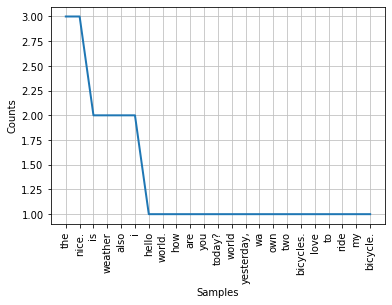

In [ ]:
flat_docs_tokenized_3 = [item for sublist in docs_tokenized_lower_lemmatized for item in sublist]
freq_dist_3 = nltk.FreqDist(flat_docs_tokenized_3)
freq_dist_3.plot(30, cumulative=False)

Now, `bicycle` appears only once in the results. But we see some words which are not very informative for our analysis, e.g., `the`, `is`, or `.`.

# Again, back to preprocessing
One typically removes these so-called stopwords before mining the texts. `NLTK` provides a list of standard English stopwords.

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Again, we iterate through our list of documents and only extract tokens that are not stopwords and alphanumeric (no punctuation or special characters).

In [ ]:
docs_tokenized_lower_lemmatized_reduced = []
for doc in docs_tokenized_lower_lemmatized:
    tokens = []
    for token in doc:
        if token.isalpha() and token not in stopwords.words('english'):
            tokens.append(token)
    docs_tokenized_lower_lemmatized_reduced.append(tokens)

In [ ]:
docs_tokenized_lower_lemmatized_reduced

[['hello'],
 [],
 ['world'],
 ['weather', 'also'],
 ['weather', 'wa', 'also'],
 ['two'],
 ['love', 'ride']]

# Plot the final results

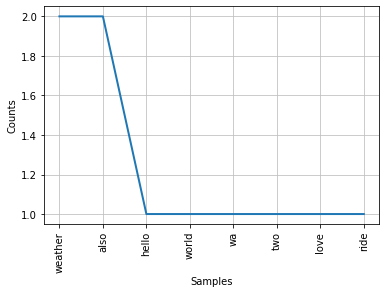

In [ ]:
flat_docs_tokenized_4 = [item for sublist in docs_tokenized_lower_lemmatized_reduced for item in sublist]
freq_dist_4 = nltk.FreqDist(flat_docs_tokenized_4)
freq_dist_4.plot(30, cumulative=False)

Now we are happy!